### 6. Using mdtraj, in a jupyter notebook, align your alphafold predictions to the crystal structure and make a bar plot showing the RMSD of each predicted structure to the crystal structure based on alpha-carbons and based on the full backbone and side-chains. Does alphafold get everything right or just the backbone structure?

### https://github.com/google-deepmind/alphafold
### https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb

In [31]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load alphafold predictions
alphafold_1= md.load_pdb('../Inputs/2W9T/unrelaxed_model_1_pred_0.pdb')
alphafold_2= md.load_pdb('../Inputs/2W9T/unrelaxed_model_2_pred_0.pdb')
alphafold_3= md.load_pdb('../Inputs/2W9T/unrelaxed_model_3_pred_0.pdb')
alphafold_4= md.load_pdb('../Inputs/2W9T/unrelaxed_model_4_pred_0.pdb')
alphafold_5= md.load_pdb('../Inputs/2W9T/unrelaxed_model_5_pred_0.pdb')

# load colabfold predictions
colabfold_1 = md.load_pdb('../Inputs/2W9T_ColabFold_596c5/2W9T_ColabFold_596c5_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb')
colabfold_2 = md.load_pdb('../Inputs/2W9T_ColabFold_596c5/2W9T_ColabFold_596c5_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb')
colabfold_3 = md.load_pdb('../Inputs/2W9T_ColabFold_596c5/2W9T_ColabFold_596c5_unrelaxed_rank_003_alphafold2_ptm_model_3_seed_000.pdb')
colabfold_4 = md.load_pdb('../Inputs/2W9T_ColabFold_596c5/2W9T_ColabFold_596c5_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb')
colabfold_5 = md.load_pdb('../Inputs/2W9T_ColabFold_596c5/2W9T_ColabFold_596c5_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb')

# load crystal structure, only chain A
crystal_structure = md.load_pdb('../Inputs/2W9T.pdb')
crystal_chainA = crystal_structure.atom_slice(crystal_structure.top.select('chainid 0'))

print(alphafold_1)
print(colabfold_1)
print(crystal_structure)

<mdtraj.Trajectory with 1 frames, 1304 atoms, 161 residues, without unitcells>
<mdtraj.Trajectory with 1 frames, 1304 atoms, 161 residues, without unitcells>
<mdtraj.Trajectory with 1 frames, 2706 atoms, 454 residues, and unitcells>


[array([0.49475843], dtype=float32), array([0.49466842], dtype=float32), array([0.4955558], dtype=float32), array([0.49672833], dtype=float32), array([0.4946401], dtype=float32), array([0.49754256], dtype=float32), array([0.49753794], dtype=float32), array([0.49567893], dtype=float32), array([0.49753332], dtype=float32), array([0.49322915], dtype=float32)]


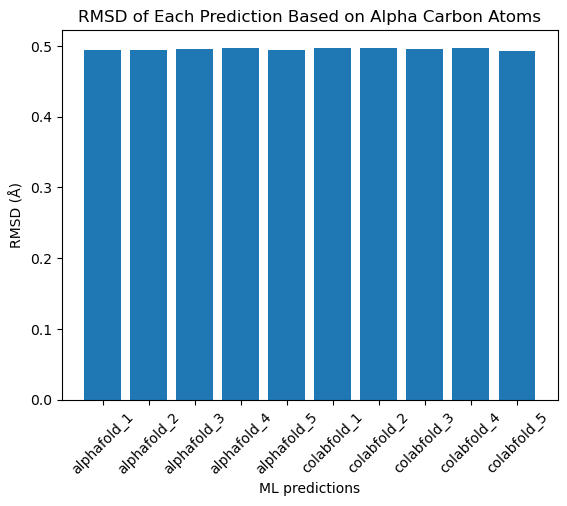

In [15]:
# calculate rmsd of each predicted strucutre based on alpha carbon atoms
pdblist=[alphafold_1,alphafold_2,alphafold_3,alphafold_4,alphafold_5,
         colabfold_1,colabfold_2,colabfold_3,colabfold_4,colabfold_5]
rmsd_CA=[]
for i in pdblist:
    rmsd_CA.append(md.rmsd(i, crystal_chainA, atom_indices=crystal_chainA.top.select('name CA')))
print(rmsd_CA)

# make a bar plot for the rmsd of each predicted strucutre based on alpha carbon atoms

x_labels = ['alphafold_1', 'alphafold_2', 'alphafold_3', 'alphafold_4', 'alphafold_5', 'colabfold_1', 'colabfold_2', 'colabfold_3', 'colabfold_4', 'colabfold_5']
y_values = np.array(rmsd_CA).flatten()
plt.bar(x_labels, y_values)
# set labels
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.xticks(rotation=45)

plt.title('RMSD of Each Prediction Based on Alpha Carbon Atoms')

# save figure
plt.savefig("../Figures/RMSD_Based_on_Alpha_Carbon_Atoms.png",format="png")
plt.show()

[array([0.49475843], dtype=float32), array([0.49466842], dtype=float32), array([0.4955558], dtype=float32), array([0.49672833], dtype=float32), array([0.4946401], dtype=float32), array([0.49754256], dtype=float32), array([0.49753794], dtype=float32), array([0.49567893], dtype=float32), array([0.49753332], dtype=float32), array([0.49322915], dtype=float32)]


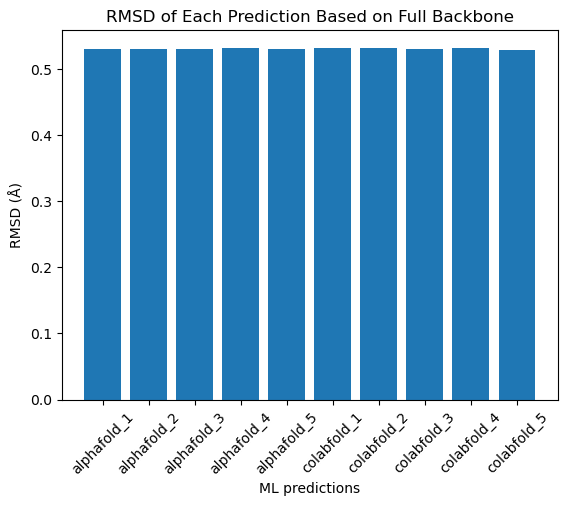

In [18]:
# calculate rmsd of each predicted strucutre based on full backbone
pdblist=[alphafold_1,alphafold_2,alphafold_3,alphafold_4,alphafold_5,
         colabfold_1,colabfold_2,colabfold_3,colabfold_4,colabfold_5]
rmsd_backbone=[]
for i in pdblist:
    rmsd_backbone.append(md.rmsd(i, crystal_chainA, atom_indices=crystal_chainA.top.select('backbone')))
print(rmsd_CA)

# make a bar plot for the rmsd of each predicted strucutre based on full backbone

x_labels = ['alphafold_1', 'alphafold_2', 'alphafold_3', 'alphafold_4', 'alphafold_5', 'colabfold_1', 'colabfold_2', 'colabfold_3', 'colabfold_4', 'colabfold_5']
y_values = np.array(rmsd_backbone).flatten()
plt.bar(x_labels, y_values)
# set labels
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.xticks(rotation=45)

plt.title('RMSD of Each Prediction Based on Full Backbone')

# save figure
plt.savefig("../Figures/RMSD_Based_on_Full_Backbone.png",format="png")
plt.show()

[array([0.49475843], dtype=float32), array([0.49466842], dtype=float32), array([0.4955558], dtype=float32), array([0.49672833], dtype=float32), array([0.4946401], dtype=float32), array([0.49754256], dtype=float32), array([0.49753794], dtype=float32), array([0.49567893], dtype=float32), array([0.49753332], dtype=float32), array([0.49322915], dtype=float32)]


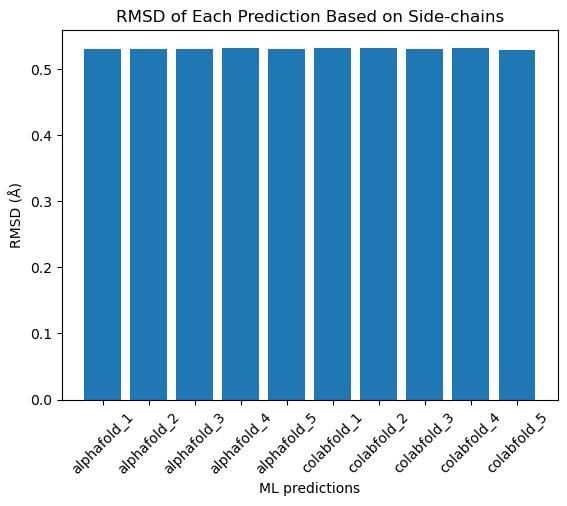

In [19]:
# calculate rmsd of each predicted strucutre based on side-chains
pdblist=[alphafold_1,alphafold_2,alphafold_3,alphafold_4,alphafold_5,
         colabfold_1,colabfold_2,colabfold_3,colabfold_4,colabfold_5]
rmsd_sidechain=[]
for i in pdblist:
    rmsd_sidechain.append(md.rmsd(i, crystal_chainA, atom_indices=crystal_chainA.top.select('sidechain')))
print(rmsd_CA)

# make a bar plot for the rmsd of each predicted strucutre based on side-chains

x_labels = ['alphafold_1', 'alphafold_2', 'alphafold_3', 'alphafold_4', 'alphafold_5', 'colabfold_1', 'colabfold_2', 'colabfold_3', 'colabfold_4', 'colabfold_5']
y_values = np.array(rmsd_backbone).flatten()
plt.bar(x_labels, y_values)
# set labels
plt.xlabel('ML predictions')
plt.ylabel('RMSD (Å)')
plt.xticks(rotation=45)

plt.title('RMSD of Each Prediction Based on Side-chains')

# save figure
plt.savefig("../Figures/RMSD_Based_on_Sidechains.png",format="png")
plt.show()

### 7. From your alphafold greene output, make a picture of your protein colored by PLDDT score (stored in B-factor column), and put it in your figures folder. Which residues should we be confident in?

In [34]:
pip install py3Dmol

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import py3Dmol
import numpy as np

In [7]:
import py3Dmol
import re

# Load the protein structure (PDB file)
# Replace 'your_protein.pdb' with your protein structure file
protein_pdb_file = '../Inputs/2W9T/ranked_0.pdb'


# Read the protein structure
with open(protein_pdb_file, 'r') as f:
    protein_pdb = f.readlines()

# Create a 3Dmol viewer
viewer = py3Dmol.view(width=800, height=400)

# Create a colormap for PLDDT scores
min_score = float('inf')
max_score = float('-inf')
score_dict = {}

# Extract PLDDT scores from the PDB file
for line in protein_pdb:
    if line.startswith("ATOM"):
        # Extract the PLDDT score from the line
        plddt_match = re.search(r"  ([0-9]+\.[0-9]+) ", line)
        if plddt_match:
            plddt_score = float(plddt_match.group(1))
            chain = line[21]
            resi = int(line[22:26])

            # Update min and max scores for colormap scaling
            min_score = min(min_score, plddt_score)
            max_score = max(max_score, plddt_score)

            # Store the score for the residue using a tuple (chain, resi)
            score_dict[(chain, resi)] = plddt_score

# Define the colormap for PLDDT scores based on the extracted range
def get_color(score):
    r = int(255 * (score - min_score) / (max_score - min_score))
    b = 255 - r
    return f'rgb({r},0,{b})'

# Color each residue based on its PLDDT score
for residue_info, plddt_score in score_dict.items():
    chain, resi = residue_info
    color = get_color(plddt_score)
    viewer.setStyle({'chain': chain, 'resi': resi}, {'ribbon': {'color': color}})

# Load the protein structure into the viewer
viewer.addModel(''.join(protein_pdb), 'pdb')

# Zoom to fit the structure
viewer.zoomTo()

# Show the 3D visualization with ribbon diagrams
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol